<a href="https://colab.research.google.com/github/LuisGDP1711/PDSeI_Deteccion_Peso_Cuyes/blob/main/U02/Copia_de_PDSeI_Practica_Redes_Neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Diaz Purizaga Luis Gianfranco

2. Ortiz Salvador Edinson Elias

3. Vera Noriega Brayan Stalin


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [1]:
!pip install -q kaggle
!pip install -q scikeras

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luisgianfranco","key":"2a7c02d35c4a881814b4a15030ef7216"}'}

# Descargar la base de datos

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 99% 62.0M/62.6M [00:04<00:00, 22.6MB/s]
100% 62.6M/62.6M [00:04<00:00, 16.2MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [4]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [5]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


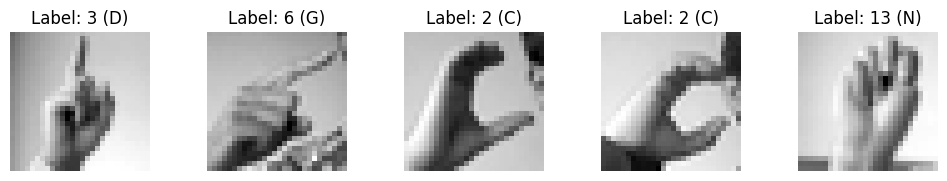

In [7]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Argumentation

In [10]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?

Hace referencia a un proceso en donde se le aplican transformaciones de rotación y/o escalamiento de las imágenes de entrenamiento para mejorar la precisión; beneficia al entrenamiento dado a que aumenta los datos de entrenamiento (debido a que una misma imagen se le puede rotar y/o escalar y hacer obtener otra imagen que será usada para el entrenamiento).

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
Normalizar las imágenes permite disminuir el coste computacional dado a que las imagenes brindadas se modifican (reduccion de pixeles) para obtener únicamente los pixeles necesarios para lograr identificar y/o clasificar la imagen.

```



# Creación del modelo

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
Conv2D: Aplica convolución a las imágenes de entrada (filtros kernell), esto con el fin de obtener imágenes donde se resalten las características.
MaxPooling2D: Obtiene el mayor pixel de una matriz 2x2 y 3x3 (en este caso) de la imagen filtrada por Conv2D, con esto se reduce el tamaño de las imágnes y, por ende, disminuye el coste computacional.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
Hace referencia al porcentaje de redes neuronales que se van a desactivar (apagar) dentro de una capa para mejorar el rendimiento de las restantes, permitiendo una mayor efectividad, en donde se previene el sobreajuste evitando que las neuronas dependan esencialmente de otras.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
Se utiliza como filtrado con el fin de evitar un gradiente cercano a 0, es decir, activa solo las neuronas con salida positiva. Tiene como ventaja que permite la propagación del gradiente, además de aplicarse un filtrado eficaz (compara si la gradiente tiene un valor cercano a 0 o no) dado a que se reducen las neuronas menos significativas (neuronas muertas).

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
Clasifica las imágenes dandoles un porcentaje de similitud con las clases predefinidas, en donde se asigna la imagen dentro de la clase con mayor porcentaje.Se utiliza en clasificación de imágenes (de más de una clase), análisis de texto y/o reconocimiento de voz.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
Hace referencia a la matriz de pesos, en donde se aplica el producto punto entre los valores del filtro y los valores de la imagen (esto permite la derección de patrones como bordes, texturas y/o formas), generando una matriz denominada "mapa de características". Mientras más pequeño sea el filtro permite la detección de detalles locales, por lo contrario, un filtro grande detecta patrones mayores a coste de un mayor costo computacional.


6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
Implica un desplazamiento del filtro en pasos más largos, lo que permite la detección de patrones globales permitiendo una reducción del costo computacional al reducir la resolución del mapa de características resultantes

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
Se debe de considerar los requisitos de precisión en las imágenes (naturaleza de las imágenes) así como la capacidad computacional disponible, filtros más pequeños con stride de 1 son útiles para extraer características finas en las primeras capas, mientras que un stride mayor puede ayudar a reducir la complejidad en las capas posteriores.

```



# Terminación anticipada y Checkpoints

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')
# Guarda el mejor accurancy

In [13]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
Técnica de regularización que detiene el proceso de entrenamiento cuando detecta que el modelo empieza a sobreajustarse. Mejora la eficiencia, evitando el gasto innecaesario de recursos computacionales

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
Guarda el modelo que obtiene el mejor rendimiento en un conjunto de validación, esto es de utilidad debido a que al obtener mejor accurancy el modelo entrenado podrá tener una mejor eficiencia al momento de detectar y/o clasificar imágenes.
```



# Entrenamiento

In [14]:
epochs = 3

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0810 - loss: 3.0617 Modelo guardado época 1 con exactitud: 0.3550
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.0818 - loss: 3.0583 - val_accuracy: 0.3550 - val_loss: 1.9264
Epoch 2/3
852/858 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3863 - loss: 1.8615 Modelo guardado época 2 con exactitud: 0.6800
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3867 - loss: 1.8600 - val_accuracy: 0.6800 - val_loss: 0.9451
Epoch 3/3
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5562 - loss: 1.3031 Modelo guardado época 3 con exactitud: 0.7207
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5564 - loss: 1.3023 - val_accuracy: 0.7207 - val_loss: 0.7345




```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
Hace referencia al número de veces que el modelo pasará por los datos de entrenamiento en la etapa de aprendizaje. Un modelo con bajo número de épocas puede no detectar patrones, mientras que uno con muchas épocas puede generar un sobreajuste.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
Train_generator: Suministra los datos de entrenamiento, lo que permite ajustar los pesos del modelo y el establecimiento de patrones.
Val_generator: Proporciona los datos de validación, es decir, se evalúa el modelo en imágenes no incluidas ene l entrenamiento, esto con el fin de evaluar el rendimiento del modelo.
```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


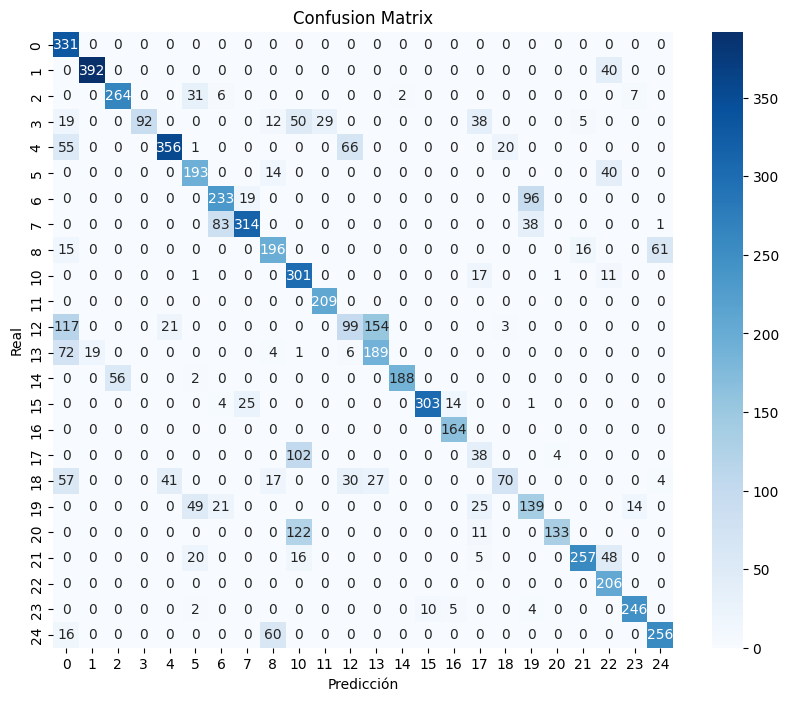

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       331
           1       0.95      0.91      0.93       432
          10       0.82      0.85      0.84       310
          11       1.00      0.38      0.55       245
          12       0.85      0.71      0.78       498
          13       0.65      0.78      0.71       247
          14       0.67      0.67      0.67       348
          15       0.88      0.72      0.79       436
          16       0.65      0.68      0.66       288
          17       0.51      0.91      0.65       331
          18       0.88      1.00      0.94       209
          19       0.49      0.25      0.33       394
           2       0.51      0.65      0.57       291
          20       0.99      0.76      0.86       246
          21       0.97      0.87      0.92       347
          22       0.90      1.00      0.95       164
          23       0.28      0.26      0.27       144
          24       0.75    

In [15]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

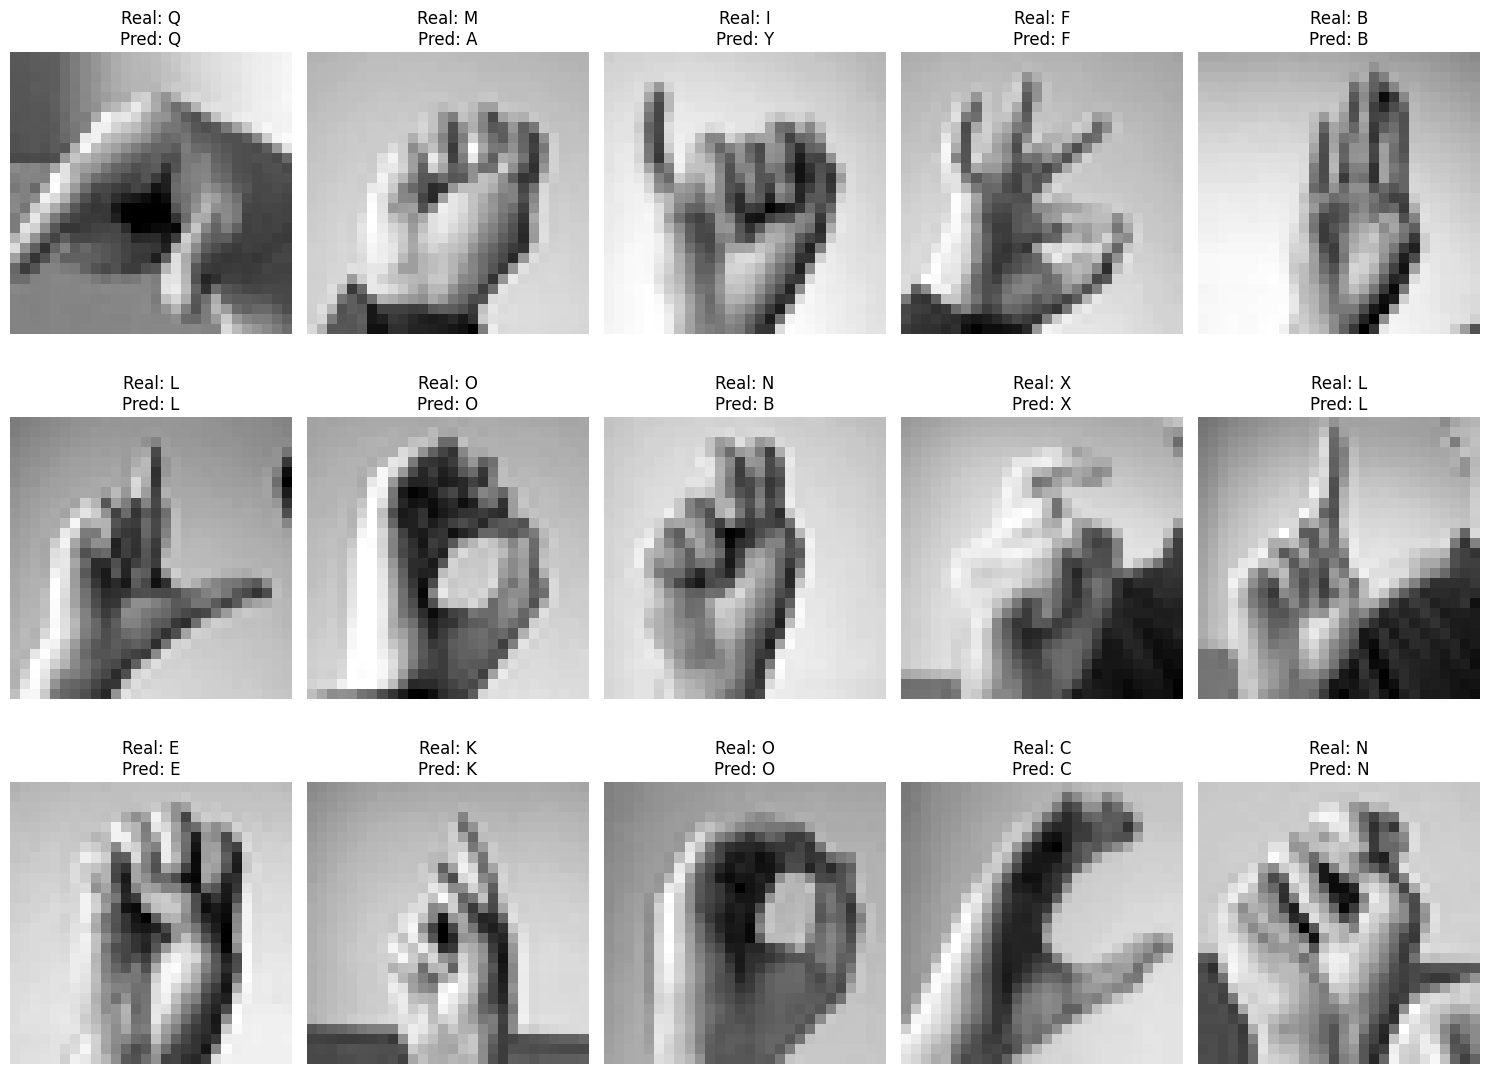

In [16]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
Herramienta de evaluación que mide el rendimiento de un modelo de clasificación, contando las predicciones correctas e incorrectas para cada clase, proporciona información acerca de cuantas instancias fueron clasificadas correctamente y cuales no.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
Proporciona un resumen detallado del rendimiento de un modelo de clasificación del conjunto de datos. Precisión, recall, f1-score, accuracy y support.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
Proporciona una medida del rendimiento en los datos no vistos en el entrenamiento ni en validación, permitiendo verificar la capacidad del modelo.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
Juega un papel crucial dado a que identifica la clase con probabilidad mayor y la define en esta, nos muestra la clase a la que pertenece.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
Mediante colores, permite la identificación de qué clases son clasificadas correctamente y en donde se produce una confusión, permite la detección de patrones en los errores.

```



# Refinamiento

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [18]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8727008902245897 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [19]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8609871723368656




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
Es una técnica de optimización de hiperparámetros en donde realiza combinaciones de estos para obtener el máximo rendimiento del modelo.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
Representan los hiperparámetros del modelo que se desean ajustar, como el tipo de optimizador, la tasa de aprendizaje, el número de capas ocultas y la tasa de dropout.Es importante dado a que influyen en el rendimiento, mejorando la convergencia y evitando el sobreajuste.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
Implica el numero de pliegues (3) o subconjuntos en los que se divide el conjunto de datos. Se entrenan, en este caso, 2 de los 3 pliegues y validarlo en el restante, se repite esto hasta que los tres pliegues sean utilizados como conjunto de validación. Influye de manera directa dado a que permite obtener una estimación más confiable (mayor rendimiento) del modelo.
```

